In [1]:
%reset
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.ticker as mticker
import warnings; warnings.filterwarnings('ignore')
import cmocean
from gsw import alpha, SA_from_SP, p_from_z, CT_from_pt, beta, sigma1 
import pandas as pd

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
%cd /archive/Raphael.Dussin/xanadu_esm4_20190304_mom6_2019.12.16/OM4p125_JRA55do1.4_mle3d_cycle3
%cd gfdl.ncrc4-intel16-prod/pp/ocean_annual_z_d2/
fs=xr.open_dataset('ocean_annual_z_d2.static.nc')
deptho=fs['deptho'][:,:]
lon=fs['geolon']; lat=fs['geolat']
lonu=fs['geolon_u']; latu=fs['geolat_u']
lonv=fs['geolon_v']; latv=fs['geolat_v']
#print(fs)
%cd av/annual_5yr

/arch2/rnd/xanadu_esm4_20190304_mom6_2019.12.16/OM4p125_JRA55do1.4_mle3d_cycle3
/arch2/rnd/xanadu_esm4_20190304_mom6_2019.12.16/OM4p125_JRA55do1.4_mle3d_cycle3/gfdl.ncrc4-intel16-prod/pp/ocean_annual_z_d2
/arch2/rnd/xanadu_esm4_20190304_mom6_2019.12.16/OM4p125_JRA55do1.4_mle3d_cycle3/gfdl.ncrc4-intel16-prod/pp/ocean_annual_z_d2/av/annual_5yr


In [3]:
def rebin(a, shape):
    sh = shape[0],a.shape[0]//shape[0],shape[1],a.shape[1]//shape[1]
    return a.reshape(sh).mean(-1).mean(1)



In [9]:
lonr=rebin(np.array(lon),(1120,1440))
latr=rebin(np.array(lat),(1120,1440))


In [5]:
data=xr.open_mfdataset('ocean_annual_z_d2.2003-2007.ann.nc')['time']
title=str(data[0].values); 
print(title)
yearly = xr.open_mfdataset(['ocean_annual_z_d2.2003-2007.ann.nc'])
fhist=yearly

agessc   = fhist.variables['agessc'][0,:,:,:]
z_l=fhist.variables['z_l'][:]
agessc.shape


2005-07-02 00:00:00


(35, 1120, 1440)

In [6]:
answer = np.empty((1120,1440)); answer[:] = np.NaN
for i in range(656,1120):
    for j in range(0,1440):
        df = pd.Series(agessc[:,i,j])
        final_index = df.last_valid_index()
        if final_index!=None:
            answer[i,j]=agessc[final_index,i,j]
            
    print(i)

656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900
901
902
903
904
905


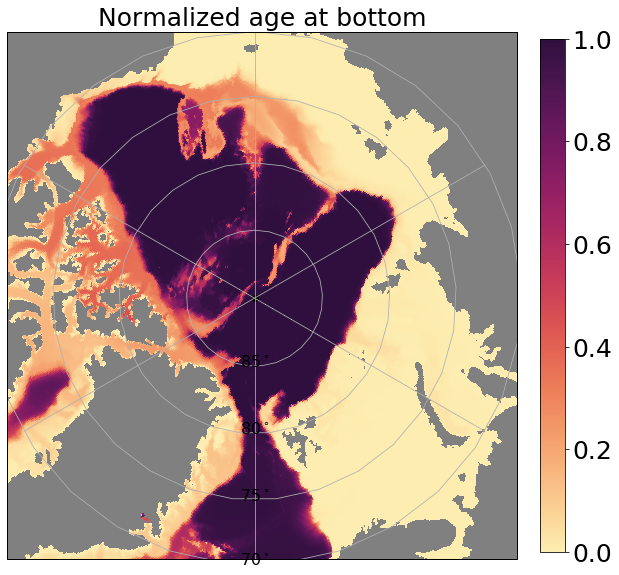

In [10]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.Orthographic(0, 90))
ax.set_extent([-180, 180, 70, 90],ccrs.PlateCarree())

plt.pcolormesh(lonr, latr,np.ones((1120,1440)),transform=ccrs.PlateCarree(),cmap='gray',vmin=0,vmax=2);

plt.pcolormesh(lonr, latr,answer[:,:]/np.nanmax(answer),transform=ccrs.PlateCarree(),cmap=cmocean.cm.matter,vmin=0,vmax=1);

cbar=plt.colorbar(fraction=0.046, pad=0.04); cbar.ax.tick_params(labelsize=25);
gl=ax.gridlines(crs=ccrs.PlateCarree())
plt.title('Normalized age at bottom',fontsize=25)
gl.ylocator = mticker.FixedLocator([70, 75, 80, 85, 90])

ax.scatter(180, 90, marker='o',c='black', transform=ccrs.PlateCarree())
pointx=[0,0,0,0]; pointy=[70,75,80,85]; text=['70$^\circ$','75$^\circ$','80$^\circ$','85$^\circ$']
for i in range(len(pointx)):
    ax.text(pointx[i],pointy[i],text[i],ha='center', transform=ccrs.PlateCarree(),fontsize=16,color='black')


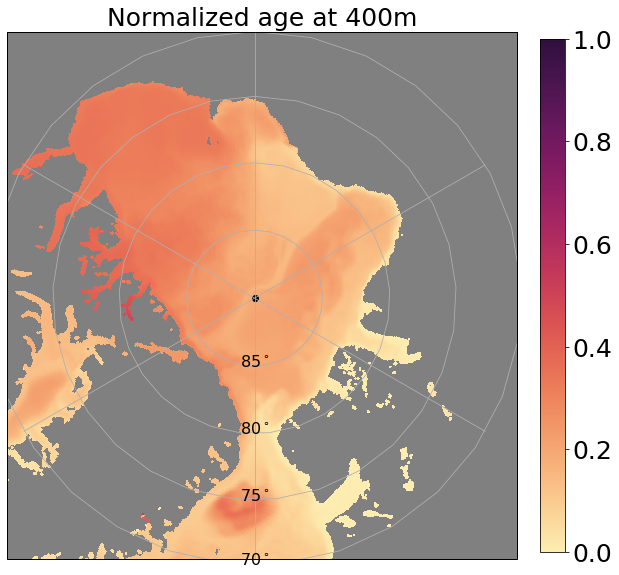

In [11]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.Orthographic(0, 90))
ax.set_extent([-180, 180, 70, 90],ccrs.PlateCarree())

plt.pcolormesh(lonr, latr,np.ones((1120,1440)),transform=ccrs.PlateCarree(),cmap='gray',vmin=0,vmax=2);

plt.pcolormesh(lonr, latr,agessc[12,:,:]/np.nanmax(answer),transform=ccrs.PlateCarree(),cmap=cmocean.cm.matter,vmin=0,vmax=1);

cbar=plt.colorbar(fraction=0.046, pad=0.04); cbar.ax.tick_params(labelsize=25);
gl=ax.gridlines(crs=ccrs.PlateCarree())
plt.title('Normalized age at 400m',fontsize=25)
gl.ylocator = mticker.FixedLocator([70, 75, 80, 85, 90])

ax.scatter(180, 90, marker='o',c='black', transform=ccrs.PlateCarree())
pointx=[0,0,0,0]; pointy=[70,75,80,85]; text=['70$^\circ$','75$^\circ$','80$^\circ$','85$^\circ$']
for i in range(len(pointx)):
    ax.text(pointx[i],pointy[i],text[i],ha='center', transform=ccrs.PlateCarree(),fontsize=16,color='black')

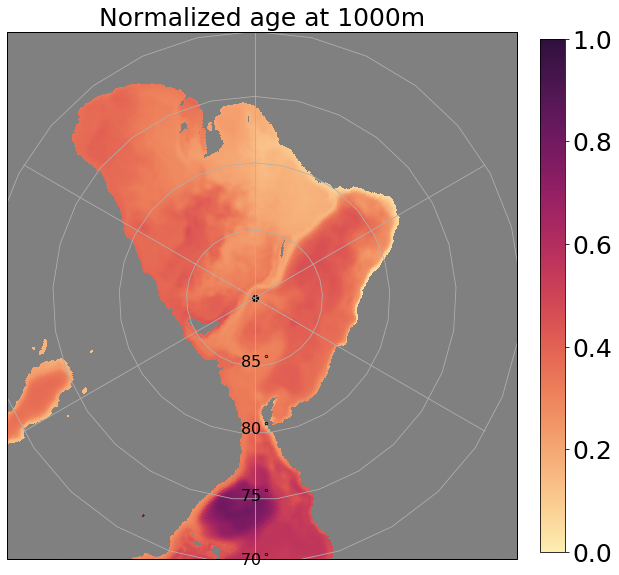

In [16]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.Orthographic(0, 90))
ax.set_extent([-180, 180, 70, 90],ccrs.PlateCarree())

plt.pcolormesh(lonr, latr,np.ones((1120,1440)),transform=ccrs.PlateCarree(),cmap='gray',vmin=0,vmax=2);

plt.pcolormesh(lonr, latr,agessc[18,:,:]/np.nanmax(answer),transform=ccrs.PlateCarree(),cmap=cmocean.cm.matter,vmin=0,vmax=1);

cbar=plt.colorbar(fraction=0.046, pad=0.04); cbar.ax.tick_params(labelsize=25);
gl=ax.gridlines(crs=ccrs.PlateCarree())
plt.title('Normalized age at 1000m',fontsize=25)
gl.ylocator = mticker.FixedLocator([70, 75, 80, 85, 90])

ax.scatter(180, 90, marker='o',c='black', transform=ccrs.PlateCarree())
pointx=[0,0,0,0]; pointy=[70,75,80,85]; text=['70$^\circ$','75$^\circ$','80$^\circ$','85$^\circ$']
for i in range(len(pointx)):
    ax.text(pointx[i],pointy[i],text[i],ha='center', transform=ccrs.PlateCarree(),fontsize=16,color='black')

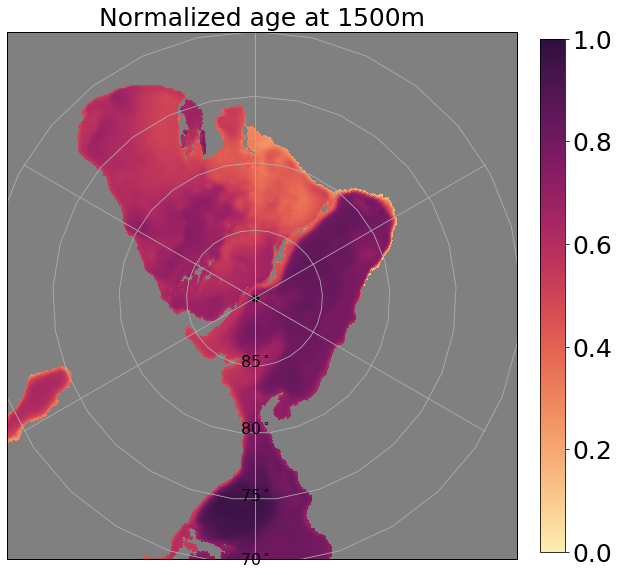

In [17]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.Orthographic(0, 90))
ax.set_extent([-180, 180, 70, 90],ccrs.PlateCarree())

plt.pcolormesh(lonr, latr,np.ones((1120,1440)),transform=ccrs.PlateCarree(),cmap='gray',vmin=0,vmax=2);

plt.pcolormesh(lonr, latr,agessc[23,:,:]/np.nanmax(answer),transform=ccrs.PlateCarree(),cmap=cmocean.cm.matter,vmin=0,vmax=1);

cbar=plt.colorbar(fraction=0.046, pad=0.04); cbar.ax.tick_params(labelsize=25);
gl=ax.gridlines(crs=ccrs.PlateCarree())
plt.title('Normalized age at 1500m',fontsize=25)
gl.ylocator = mticker.FixedLocator([70, 75, 80, 85, 90])

ax.scatter(180, 90, marker='o',c='black', transform=ccrs.PlateCarree())
pointx=[0,0,0,0]; pointy=[70,75,80,85]; text=['70$^\circ$','75$^\circ$','80$^\circ$','85$^\circ$']
for i in range(len(pointx)):
    ax.text(pointx[i],pointy[i],text[i],ha='center', transform=ccrs.PlateCarree(),fontsize=16,color='black')

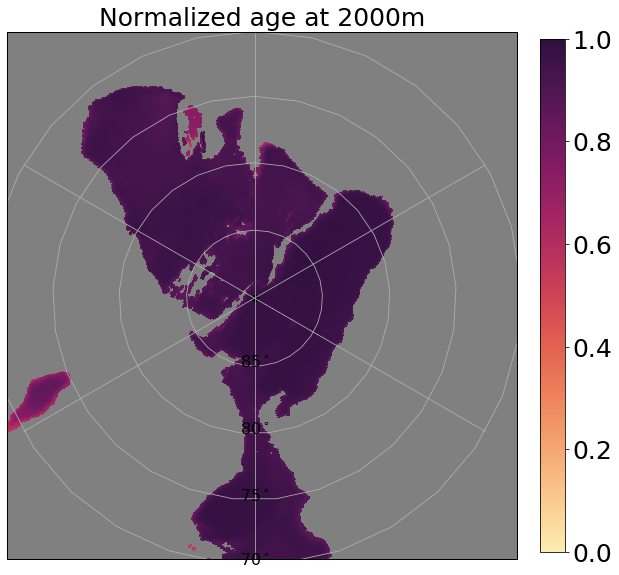

In [19]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.Orthographic(0, 90))
ax.set_extent([-180, 180, 70, 90],ccrs.PlateCarree())

plt.pcolormesh(lonr, latr,np.ones((1120,1440)),transform=ccrs.PlateCarree(),cmap='gray',vmin=0,vmax=2);

plt.pcolormesh(lonr, latr,agessc[25,:,:]/np.nanmax(answer),transform=ccrs.PlateCarree(),cmap=cmocean.cm.matter,vmin=0,vmax=1);

cbar=plt.colorbar(fraction=0.046, pad=0.04); cbar.ax.tick_params(labelsize=25);
gl=ax.gridlines(crs=ccrs.PlateCarree())
plt.title('Normalized age at 2000m',fontsize=25)
gl.ylocator = mticker.FixedLocator([70, 75, 80, 85, 90])

ax.scatter(180, 90, marker='o',c='black', transform=ccrs.PlateCarree())
pointx=[0,0,0,0]; pointy=[70,75,80,85]; text=['70$^\circ$','75$^\circ$','80$^\circ$','85$^\circ$']
for i in range(len(pointx)):
    ax.text(pointx[i],pointy[i],text[i],ha='center', transform=ccrs.PlateCarree(),fontsize=16,color='black')

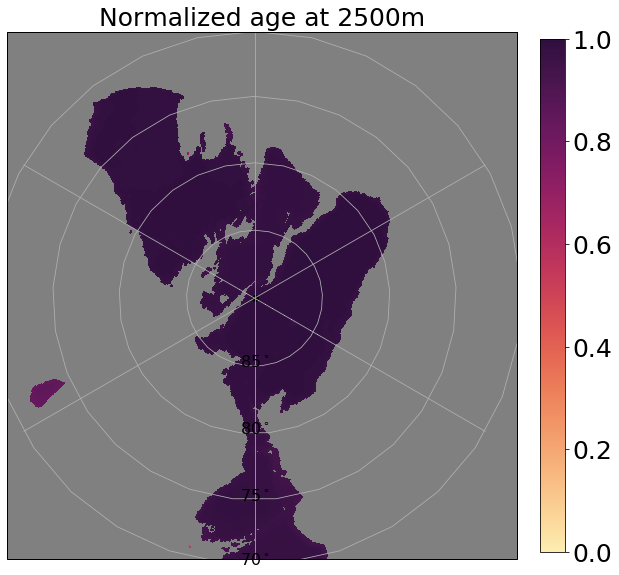

In [21]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.Orthographic(0, 90))
ax.set_extent([-180, 180, 70, 90],ccrs.PlateCarree())

plt.pcolormesh(lonr, latr,np.ones((1120,1440)),transform=ccrs.PlateCarree(),cmap='gray',vmin=0,vmax=2);

plt.pcolormesh(lonr, latr,agessc[26,:,:]/np.nanmax(answer),transform=ccrs.PlateCarree(),cmap=cmocean.cm.matter,vmin=0,vmax=1);

cbar=plt.colorbar(fraction=0.046, pad=0.04); cbar.ax.tick_params(labelsize=25);
gl=ax.gridlines(crs=ccrs.PlateCarree())
plt.title('Normalized age at 2500m',fontsize=25)
gl.ylocator = mticker.FixedLocator([70, 75, 80, 85, 90])

ax.scatter(180, 90, marker='o',c='black', transform=ccrs.PlateCarree())
pointx=[0,0,0,0]; pointy=[70,75,80,85]; text=['70$^\circ$','75$^\circ$','80$^\circ$','85$^\circ$']
for i in range(len(pointx)):
    ax.text(pointx[i],pointy[i],text[i],ha='center', transform=ccrs.PlateCarree(),fontsize=16,color='black')

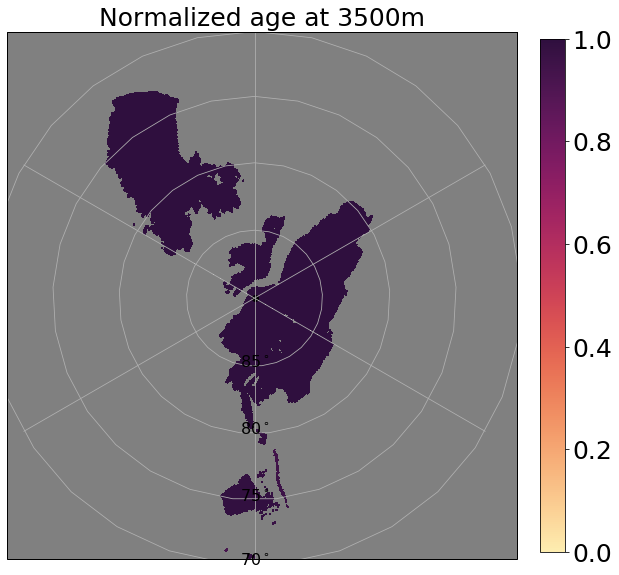

In [23]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.Orthographic(0, 90))
ax.set_extent([-180, 180, 70, 90],ccrs.PlateCarree())

plt.pcolormesh(lonr, latr,np.ones((1120,1440)),transform=ccrs.PlateCarree(),cmap='gray',vmin=0,vmax=2);

plt.pcolormesh(lonr, latr,agessc[28,:,:]/np.nanmax(answer),transform=ccrs.PlateCarree(),cmap=cmocean.cm.matter,vmin=0,vmax=1);

cbar=plt.colorbar(fraction=0.046, pad=0.04); cbar.ax.tick_params(labelsize=25);
gl=ax.gridlines(crs=ccrs.PlateCarree())
plt.title('Normalized age at 3500m',fontsize=25)
gl.ylocator = mticker.FixedLocator([70, 75, 80, 85, 90])

ax.scatter(180, 90, marker='o',c='black', transform=ccrs.PlateCarree())
pointx=[0,0,0,0]; pointy=[70,75,80,85]; text=['70$^\circ$','75$^\circ$','80$^\circ$','85$^\circ$']
for i in range(len(pointx)):
    ax.text(pointx[i],pointy[i],text[i],ha='center', transform=ccrs.PlateCarree(),fontsize=16,color='black')

In [24]:
np.nanmax(answer)

169.61038208007812

In [27]:
np.nanmax(np.array(agessc))

169.61356